In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Imports
import numpy as np
import pandas as pd
import os
import sklearn
from  matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

# **EDA**

In [3]:
#Reading the train meta data
train_data = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/train.csv")
train_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [4]:
# Reading the test metadata
test_data = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/test.csv")
test_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [5]:
#Assigning the X and y columns and performing the train test split
X = train_data.iloc[:,1:13]
X

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0,1,1,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,1,1,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0,0,0,1,0,0,0,0,0,0,0,1
9908,0,1,1,1,0,0,0,0,0,0,0,0
9909,0,1,1,1,0,0,0,0,1,1,0,0
9910,0,1,1,1,0,0,0,0,1,0,0,0


In [6]:
y = train_data["Pawpularity"]
y

0       63
1       42
2       28
3       15
4       72
        ..
9907    15
9908    70
9909    20
9910    20
9911    30
Name: Pawpularity, Length: 9912, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# **Visuals**

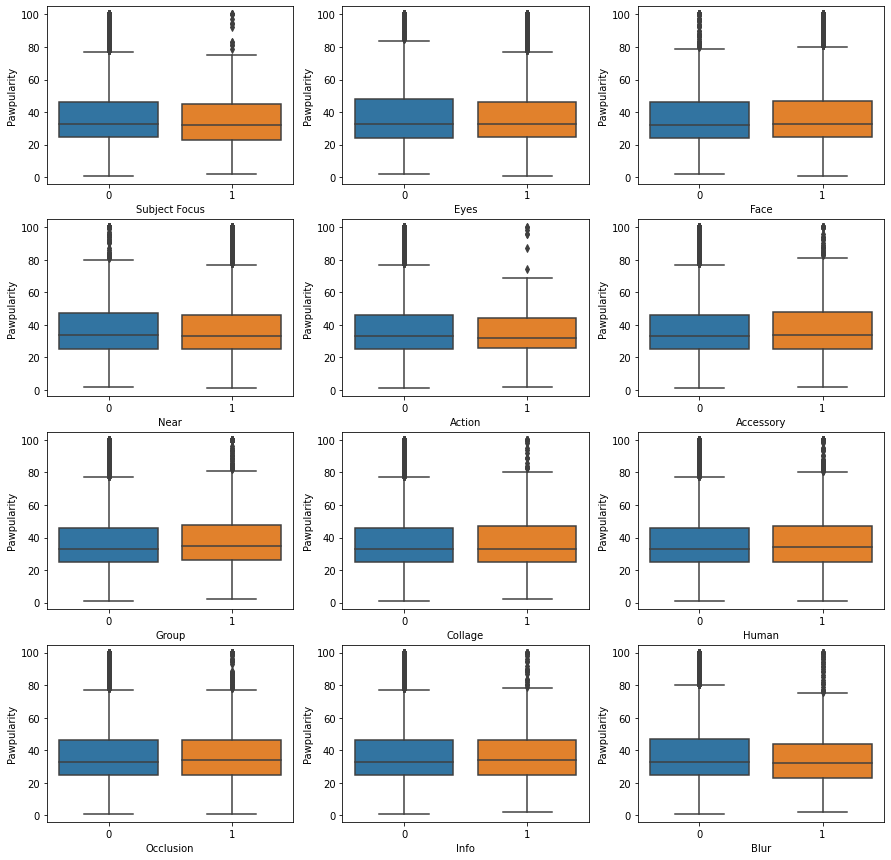

In [8]:
#Checking for correlation between the input and target variable to spot the obvious trends if any
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
for var, subplot in zip(X, ax.flatten()):
    sns.boxplot(x=var, y='Pawpularity', data=train_data, ax=subplot)

Since the boxes of each feature against the target variable does not show a striking difference & the boxes of 0's and 1's are almost at the same level. Hence, there's no direct relationship of each variable with the target.

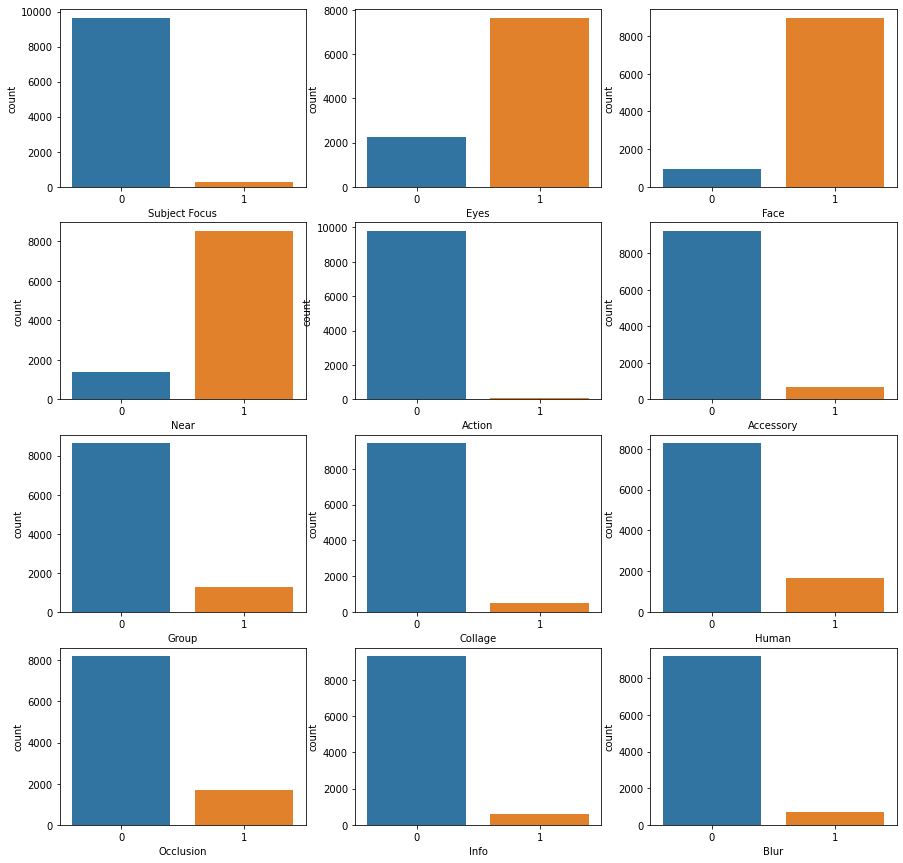

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
for var, subplot in zip(X, ax.flatten()):
    sns.countplot(x=var, data=train_data, ax=subplot);

From the above histograms, we can deduce that the feature values are highly unbalanced in the given datatset. Hence, before applying the ML models, we need to perform stratified sampling on the train set.

# **Stratified ShuffleSplit cross validator example**

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=77)
sss.get_n_splits(X, y)
print(sss)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

StratifiedShuffleSplit(n_splits=1, random_state=77, test_size=0.2,
            train_size=None)
TRAIN: [8660 5489 4414 ... 5220  590 8513] TEST: [3339 7586 6049 ... 5606  233 1526]


# Linear Regression on the metadata (Baseline)

TRAIN: [8660 5489 4414 ... 5220  590 8513] TEST: [3339 7586 6049 ... 5606  233 1526]
[ 0.04346444 -1.65386     1.28129275  0.22994248  0.12267277  0.7214842
  1.01855757 -0.02730326  0.34971997 -0.35028398  0.43305171 -2.5182368 ]


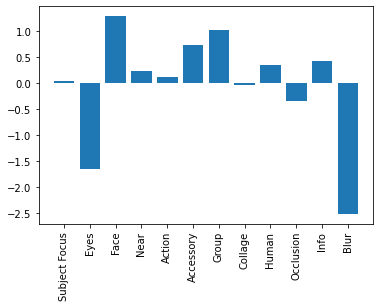

Mean Absolute Error: 15.377698510295215
Mean Squared Error: 422.94080183837707
Root Mean Squared Error: 3.921440871707135
Mean Absolute Percentage Error: 78.55283205414032
[38.1170716 37.2670716 37.4270716 39.6770716 38.4870716 42.0470716
 36.3370716 37.0770716]
                                 Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    38.117072
1  43a2262d7738e3d420d453815151079e    37.267072
2  4e429cead1848a298432a0acad014c9d    37.427072
3  80bc3ccafcc51b66303c2c263aa38486    39.677072
4  8f49844c382931444e68dffbe20228f4    38.487072
5  b03f7041962238a7c9d6537e22f9b017    42.047072
6  c978013571258ed6d4637f6e8cc9d6a3    36.337072
7  e0de453c1bffc20c22b072b34b54e50f    37.077072
TRAIN: [ 439    5 9338 ... 6371 6602  563] TEST: [2307 3878 1323 ... 4882 8931 7781]
[-0.615263   -2.21619213  2.5078341   0.50799417  1.36743014  0.91058408
  1.26901271  0.06474539  0.4259765   0.2593569  -0.33343234 -4.10685615]


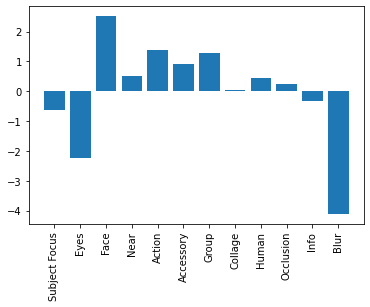

Mean Absolute Error: 15.415203767594202
Mean Squared Error: 424.83591313586464
Root Mean Squared Error: 3.9262200355550885
Mean Absolute Percentage Error: 78.89810137172633
[37.23460465 36.12460465 35.58460465 38.57460465 38.95460465 43.74460465
 34.55460465 35.22460465]
                                 Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    37.234605
1  43a2262d7738e3d420d453815151079e    36.124605
2  4e429cead1848a298432a0acad014c9d    35.584605
3  80bc3ccafcc51b66303c2c263aa38486    38.574605
4  8f49844c382931444e68dffbe20228f4    38.954605
5  b03f7041962238a7c9d6537e22f9b017    43.744605
6  c978013571258ed6d4637f6e8cc9d6a3    34.554605
7  e0de453c1bffc20c22b072b34b54e50f    35.224605
TRAIN: [5004 5811 3230 ...  504 8635 9764] TEST: [8852 3581 1335 ... 6555 1452 5753]
[-1.55038524 -2.38196834  2.30548597  0.96996605  0.93447883  0.71895033
  1.29990732  0.10603571 -0.09571455  0.3164119  -0.61645272 -3.99290103]


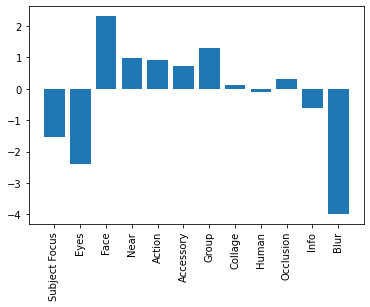

Mean Absolute Error: 15.412975571594206
Mean Squared Error: 424.7184863693435
Root Mean Squared Error: 3.9259362668787947
Mean Absolute Percentage Error: 78.80748045650728
[36.15713111 36.07713111 35.85713111 37.18713111 36.88713111 42.66713111
 32.96713111 33.71713111]
                                 Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    36.157131
1  43a2262d7738e3d420d453815151079e    36.077131
2  4e429cead1848a298432a0acad014c9d    35.857131
3  80bc3ccafcc51b66303c2c263aa38486    37.187131
4  8f49844c382931444e68dffbe20228f4    36.887131
5  b03f7041962238a7c9d6537e22f9b017    42.667131
6  c978013571258ed6d4637f6e8cc9d6a3    32.967131
7  e0de453c1bffc20c22b072b34b54e50f    33.717131
TRAIN: [1251  487 1995 ... 7954 3846 6502] TEST: [4388 1794 8452 ... 2733 3215 3156]
[-1.5681445  -2.47098167  2.10410912  0.48151685  0.34209343  0.39645754
  1.16861674  0.01990233 -0.07188633  0.22594894 -0.95568718 -3.86296209]


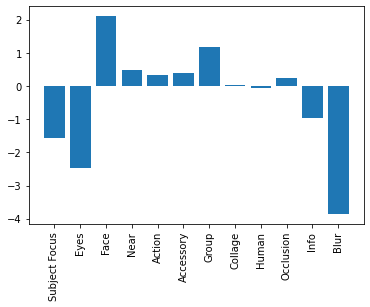

Mean Absolute Error: 15.399012249850884
Mean Squared Error: 424.43695815079184
Root Mean Squared Error: 3.924157521029308
Mean Absolute Percentage Error: 78.76491815247253
[36.26348204 36.51348204 35.27348204 37.36348204 35.88348204 41.27348204
 32.39348204 34.39348204]
                                 Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    36.263482
1  43a2262d7738e3d420d453815151079e    36.513482
2  4e429cead1848a298432a0acad014c9d    35.273482
3  80bc3ccafcc51b66303c2c263aa38486    37.363482
4  8f49844c382931444e68dffbe20228f4    35.883482
5  b03f7041962238a7c9d6537e22f9b017    41.273482
6  c978013571258ed6d4637f6e8cc9d6a3    32.393482
7  e0de453c1bffc20c22b072b34b54e50f    34.393482
TRAIN: [ 441  899 7679 ... 7541 8577 1314] TEST: [9793 8817 3150 ... 2473  854 1473]
[-0.77372902 -2.49697022  2.74084226  0.14204276 -1.3453048   0.634687
  1.3057222   0.30103566 -0.11465076  0.16486339 -1.22355012 -3.72891545]


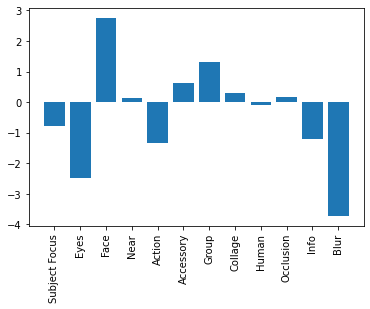

Mean Absolute Error: 15.429594317085101
Mean Squared Error: 424.60610282030717
Root Mean Squared Error: 3.928052229424286
Mean Absolute Percentage Error: 78.92637832268807
[37.84418917 36.61418917 35.09418917 38.25418917 35.49418917 39.94418917
 31.52418917 35.63418917]
                                 Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    37.844189
1  43a2262d7738e3d420d453815151079e    36.614189
2  4e429cead1848a298432a0acad014c9d    35.094189
3  80bc3ccafcc51b66303c2c263aa38486    38.254189
4  8f49844c382931444e68dffbe20228f4    35.494189
5  b03f7041962238a7c9d6537e22f9b017    39.944189
6  c978013571258ed6d4637f6e8cc9d6a3    31.524189
7  e0de453c1bffc20c22b072b34b54e50f    35.634189


In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=77)
sss.get_n_splits(X, y)
# X, y = make_regression(n_samples=9912, n_features=12, random_state=1)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    model = LinearRegression()

    model.fit(X_train, y_train)

    importance = model.coef_

    print(importance)

    importance_linear_reg = pd.DataFrame(importance, columns=["Importance"])
    X_columns = train_data.iloc[:,1:13]
    importance_linear_reg["Importance"] = round(importance_linear_reg["Importance"],2)
    importance_linear_reg["Features"] = X_columns.columns
    importance_linear_reg = importance_linear_reg.sort_index(ascending = True, axis = 1)
    importance_linear_reg

    # plot feature importance
    pyplot.bar(importance_linear_reg["Features"], importance_linear_reg["Importance"])
    pyplot.xticks(rotation=90)
    pyplot.show()
    
    y_prediction =  model.predict(X_test)
    y_prediction
    
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_absolute_error(y_test, y_prediction)))
    print("Mean Absolute Percentage Error:", np.mean(np.abs((y_test - y_prediction)/y_test))*100)
    
    
    test_pred = model.predict(test_data.iloc[:,1:13])
    print(test_pred)
    
    Solution_Linear_Reg = pd.DataFrame(test_data["Id"], columns=["Id"])
    Solution_Linear_Reg['Pawpularity']=test_pred
    print(Solution_Linear_Reg)

The linear regression gives us a MAE of approximately 15. This means that the prediction can deviate by +-15 pawpularity score. Also, the MAPE is about 78%, hence we need to explore image regression techniques.

# CNN for regression prediction with Keras

In [12]:
# Preparing for loading the images
from pathlib import Path
import os.path
import pandas as pd

trainpaths = {}
testpaths ={}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'train/' in (os.path.join(dirname, filename)):
            filenames = filename.rstrip(".jpg")
            trainpaths[filenames] = os.path.join(dirname, filename)
        if 'test/' in (os.path.join(dirname, filename)):
            filenames = filename.rstrip(".jpg")
            testpaths[filenames] = os.path.join(dirname, filename)

train_path = pd.DataFrame(list(trainpaths.items()),columns=['Id', 'filepath'])
train_path = train_path.set_index('Id')
train_path
test_path = pd.DataFrame(list(testpaths.items()),columns=['Id', 'filepath'])
test_path= test_path.set_index('Id')
test_path


,filepath
Id,
c978013571258ed6d4637f6e8cc9d6a3,/kaggle/input/petfinder-pawpularity-score/test...
4e429cead1848a298432a0acad014c9d,/kaggle/input/petfinder-pawpularity-score/test...
43a2262d7738e3d420d453815151079e,/kaggle/input/petfinder-pawpularity-score/test...
8f49844c382931444e68dffbe20228f4,/kaggle/input/petfinder-pawpularity-score/test...
4128bae22183829d2b5fea10effdb0c3,/kaggle/input/petfinder-pawpularity-score/test...
80bc3ccafcc51b66303c2c263aa38486,/kaggle/input/petfinder-pawpularity-score/test...
e0de453c1bffc20c22b072b34b54e50f,/kaggle/input/petfinder-pawpularity-score/test...
b03f7041962238a7c9d6537e22f9b017,/kaggle/input/petfinder-pawpularity-score/test...


In [13]:
#Join the image file paths with the meta data files containing pawpularity 
train_merged = pd.merge(train_data, train_path, on=["Id"], how='left')
train_merged
test_merged = pd.merge(test_data, test_path, on=["Id"], how='left')
test_merged

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,filepath
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1,/kaggle/input/petfinder-pawpularity-score/test...
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0,/kaggle/input/petfinder-pawpularity-score/test...
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1,/kaggle/input/petfinder-pawpularity-score/test...
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,/kaggle/input/petfinder-pawpularity-score/test...
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,/kaggle/input/petfinder-pawpularity-score/test...
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0,/kaggle/input/petfinder-pawpularity-score/test...
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1,/kaggle/input/petfinder-pawpularity-score/test...
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1,/kaggle/input/petfinder-pawpularity-score/test...


In [14]:
#train test split
X = train_merged['filepath']
y = train_merged['Pawpularity']
s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=77)
s.get_n_splits(X, y)
for train_index, test_index in s.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
train_final = pd.merge(X_train, y_train, left_index=True, right_index=True)
print(train_final)
test_final = pd.merge(X_test, y_test, left_index=True, right_index=True)
print(test_final)

TRAIN: [8660 5489 4414 ... 5220  590 8513] TEST: [3339 7586 6049 ... 5606  233 1526]
                                               filepath  Pawpularity
8660  /kaggle/input/petfinder-pawpularity-score/trai...           83
5489  /kaggle/input/petfinder-pawpularity-score/trai...           13
4414  /kaggle/input/petfinder-pawpularity-score/trai...           56
7291  /kaggle/input/petfinder-pawpularity-score/trai...           39
5221  /kaggle/input/petfinder-pawpularity-score/trai...           80
...                                                 ...          ...
5060  /kaggle/input/petfinder-pawpularity-score/trai...           30
6355  /kaggle/input/petfinder-pawpularity-score/trai...           38
5220  /kaggle/input/petfinder-pawpularity-score/trai...           28
590   /kaggle/input/petfinder-pawpularity-score/trai...           58
8513  /kaggle/input/petfinder-pawpularity-score/trai...           20

[7929 rows x 2 columns]
                                               filepath  Pawpu

In [15]:
#Loading the images, rescaling the image pixels from range 0-255 to range 0-1
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale =1./255,
validation_split = 0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale = 1./255
)

In [16]:
#flow from Df function keras: image augmentation

train_images = train_gen.flow_from_dataframe(
    dataframe = train_final,
    x_col = 'filepath',
    y_col = 'Pawpularity',
    target_size = (32,32),
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'raw',
    subset = 'training',
    batch_size = 32,
    seed = 77    
)

validation_images = train_gen.flow_from_dataframe(
    dataframe = train_final,
    x_col = 'filepath',
    y_col = 'Pawpularity',
    target_size = (32,32),
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'raw',
    subset = 'validation',
    batch_size = 32,
    seed = 77    
)

test_images = test_gen.flow_from_dataframe(
    dataframe = test_merged,
    x_col = 'filepath',
    y_col = None,
    target_size = (32,32),
    color_mode = 'rgb',
    shuffle = False,
    class_mode = None,
    batch_size = 32,
    seed = 77    
)

Found 6344 validated image filenames.
Found 1585 validated image filenames.
Found 8 validated image filenames.


In [17]:
#Training the NN
layer1 = tf.keras.Input(shape=(32,32,3))
layer2 = tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3), padding = 'same')(layer1)
layer3 = tf.keras.activations.relu(layer2, alpha=0.0, max_value=None, threshold=0.0)
layer4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1))(layer3)
layer5 = tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3))(layer4)
layer6 = tf.keras.activations.relu(layer5, alpha=0.0, max_value=None, threshold=0.0)
layer7 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1))(layer6)

layer8 = tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), padding = 'same')(layer7)
layer9 = tf.keras.activations.relu(layer8, alpha=0.0, max_value=None, threshold=0.0)
layer10 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1))(layer9)
layer11 = tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3))(layer10)
layer12 = tf.keras.activations.relu(layer11, alpha=0.0, max_value=None, threshold=0.0)
layer13 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1))(layer12)

layer14 = tf.keras.layers.GlobalAveragePooling2D()(layer13)

layer15 = tf.keras.layers.Dense(64, activation='relu')(layer14)
layer16 = tf.keras.layers.Dense(64, activation='relu')(layer15)
layer17 = tf.keras.layers.Dense(1, activation='linear')(layer16)

model = tf.keras.Model(inputs = layer1, outputs = layer17)

model.compile(optimizer='adam',loss="mse", metrics=['accuracy'])

modelfit = model.fit(train_images, epochs = 5, validation_data = validation_images,
                    callbacks = [
                        tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=4,
                        restore_best_weights = True)
                    ])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/5
199/199 [==============================] - 137s 683ms/step - loss: 546.3018 - accuracy: 4.7289e-04 - val_loss: 441.6211 - val_accuracy: 0.0000e+00
Epoch 2/5
199/199 [==============================] - 104s 522ms/step - loss: 451.5703 - accuracy: 4.7289e-04 - val_loss: 437.4861 - val_accuracy: 0.0000e+00
Epoch 3/5
199/199 [==============================] - 104s 523ms/step - loss: 448.6653 - accuracy: 4.7289e-04 - val_loss: 431.5258 - val_accuracy: 0.0000e+00
Epoch 4/5
199/199 [==============================] - 104s 521ms/step - loss: 446.3941 - accuracy: 4.7289e-04 - val_loss: 465.1053 - val_accuracy: 0.0000e+00
Epoch 5/5
199/199 [==============================] - 103s 518ms/step - loss: 445.6248 - accuracy: 4.7289e-04 - val_loss: 429.1784 - val_accuracy: 0.0000e+00


In [18]:
#Printing the output of all the intermediate layes to understand the network better
print(layer1)
print(layer2)
print(layer3)
print(layer4)
print(layer5)
print(layer6)
print(layer7)
print(layer8)
print(layer9)
print(layer10)
print(layer11)
print(layer12)
print(layer13)
print(layer14)
print(layer15)
print(layer16)
print(layer17)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 32), dtype=tf.float32, name=None), name='conv2d/BiasAdd:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 32), dtype=tf.float32, name=None), name='tf.nn.relu/Relu:0', description="created by layer 'tf.nn.relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 31, 31, 32), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 29, 29, 32), dtype=tf.float32, name=None), name='conv2d_1/BiasAdd:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 29, 29, 32), dtype=tf.float32, name=None), name='tf.nn.relu_1/Relu:0', description="created by layer 'tf.nn.relu_1'")
KerasTensor(type_spec=TensorSpec(shape=(No

In [19]:
#Train set prediction calculations
import numpy as np
pred = np.squeeze(model.predict(train_images))
print(pred)
real_pawpularity = train_images.labels
print(real_pawpularity)
score = model.evaluate(train_images, verbose=1)
print(score)
np.sqrt(score)

[39.962696 41.40258  39.37111  ... 36.89509  40.126938 36.647495]
[21 49 27 ... 28 58 20]
199/199 [==============================] - 75s 374ms/step - loss: 430.4235 - accuracy: 4.7289e-04
[430.42352294921875, 0.00047288776841014624]


array([20.74665089,  0.02174598])

In [20]:
#Validation set prediction calculations
import numpy as np
pred = np.squeeze(model.predict(validation_images))
print(pred)
real_pawpularity = validation_images.labels
print(real_pawpularity)
score = model.evaluate(validation_images, verbose=1)
print(score)
np.sqrt(score)

[43.953243 38.685707 40.05178  ... 40.641445 41.168907 35.674545]
[83 13 56 ... 41 15 30]
50/50 [==============================] - 19s 374ms/step - loss: 429.1784 - accuracy: 0.0000e+00
[429.1784362792969, 0.0]


array([20.71662222,  0.        ])

In [21]:
#Test set  prediction calculations
import numpy as np
final_pred = model.predict(test_images)
print(final_pred)

[[38.514923]
 [39.643036]
 [38.883404]
 [38.924206]
 [39.063293]
 [39.220924]
 [39.336555]
 [39.17131 ]]


In [22]:
# Adding the final prediction for the test images into a CSV file
output = pd.DataFrame(test_merged['Id'], columns=["Id"])
output['Pawpularity']=final_pred
output['Pawpularity']= output['Pawpularity'].apply(lambda x: round(x, 2))
output = output.set_index('Id')
print(output)

                                  Pawpularity
Id                                           
4128bae22183829d2b5fea10effdb0c3        38.51
43a2262d7738e3d420d453815151079e        39.64
4e429cead1848a298432a0acad014c9d        38.88
80bc3ccafcc51b66303c2c263aa38486        38.92
8f49844c382931444e68dffbe20228f4        39.06
b03f7041962238a7c9d6537e22f9b017        39.22
c978013571258ed6d4637f6e8cc9d6a3        39.34
e0de453c1bffc20c22b072b34b54e50f        39.17


In [23]:
output

,Pawpularity
Id,
4128bae22183829d2b5fea10effdb0c3,38.51
43a2262d7738e3d420d453815151079e,39.64
4e429cead1848a298432a0acad014c9d,38.88
80bc3ccafcc51b66303c2c263aa38486,38.92
8f49844c382931444e68dffbe20228f4,39.06
b03f7041962238a7c9d6537e22f9b017,39.22
c978013571258ed6d4637f6e8cc9d6a3,39.34
e0de453c1bffc20c22b072b34b54e50f,39.17


In [24]:
# Submit the CSV
output.to_csv('./submission.csv', index = 'Id')